# Projet de Bio informatique

In [1]:
import numpy as np
import pandas
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import networkx as nx

## 1. Import des données

In [6]:
mucusOperon = pandas.read_csv('exemplesCSV/mucusOperon-MDD.csv')

print(mucusOperon.shape)


(12, 6)


In [7]:
mucusOperon.head(5)

,valid,K_operon:alg,K_operon:free,K_operon:alg:free,K_mucuB,K_mucuB:prod
0,OK,1,0,1,0,1
1,OK,1,0,1,0,0
2,OK,1,0,1,1,1
3,OK,1,0,2,0,0
4,OK,1,0,2,0,1


In [9]:
mucusOperon.loc[mucusOperon["valid"]=="OK", "valid"] = 1
mucusOperon.loc[mucusOperon["valid"]=="KO", "valid"] = 0
pandas.to_numeric(mucusOperon["valid"])
mucusOperon.dtypes

valid                object
K_operon:alg          int64
K_operon:free         int64
K_operon:alg:free     int64
K_mucuB               int64
K_mucuB:prod          int64
dtype: object

In [10]:
MO = mucusOperon.values
#kmeans = KMeans(n_clusters=2, random_state=0).fit(df_array)

In [11]:
def adjacency_opt(G,tol,sigma):
    [m,n] = np.shape(G)
    W = np.zeros((m,m))
    for i in range(m):
        for j in range(i+1,m):
            d = np.sqrt(sum((G[i,:]-G[j,:])**2))
            s = np.exp(-1 * d**2 / (2*sigma**2))
            if(s > tol) : 
                W[i,j] = s
                W[j,i] = s
    return W
def mat_diag(matrice_W):
    n = np.shape(matrice_W)[0]
    d = np.sum(matrice_W,axis = 0)
    D = np.diag(d)
    return D

def Laplacian(mat_D, mat_W):
    return mat_D - mat_W

[[0.         0.60653066 0.60653066 0.36787944 0.60653066 0.36787944
  0.36787944 0.60653066 0.36787944 0.         0.36787944 0.        ]
 [0.60653066 0.         0.36787944 0.60653066 0.36787944 0.
  0.60653066 0.36787944 0.         0.36787944 0.         0.        ]
 [0.60653066 0.36787944 0.         0.         0.36787944 0.60653066
  0.         0.36787944 0.60653066 0.         0.         0.36787944]
 [0.36787944 0.60653066 0.         0.         0.60653066 0.36787944
  0.36787944 0.         0.         0.60653066 0.36787944 0.        ]
 [0.60653066 0.36787944 0.36787944 0.60653066 0.         0.60653066
  0.         0.36787944 0.         0.36787944 0.60653066 0.36787944]
 [0.36787944 0.         0.60653066 0.36787944 0.60653066 0.
  0.         0.         0.36787944 0.         0.36787944 0.60653066]
 [0.36787944 0.60653066 0.         0.36787944 0.         0.
  0.         0.60653066 0.36787944 0.         0.         0.        ]
 [0.60653066 0.36787944 0.36787944 0.         0.36787944 0.
  0.6

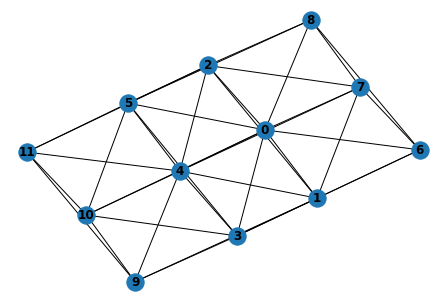

In [12]:
tol = 0.35
sigma = 1
W = adjacency_opt(MO, tol, sigma)
print(W)
G = nx.from_numpy_matrix(W)
nx.draw(G,with_labels = True, font_weight = 'bold')

In [18]:
distortions = []
K = range(1,10)
for k in K : 
    kmeanModel = KMeans(n_clusters=k).fit(W)
    distortions.append(kmeanModel.inertia_)

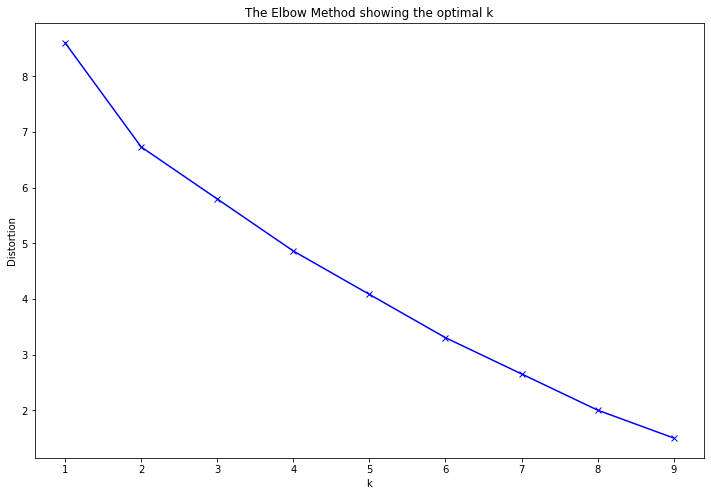

In [19]:
plt.figure(figsize=(12,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

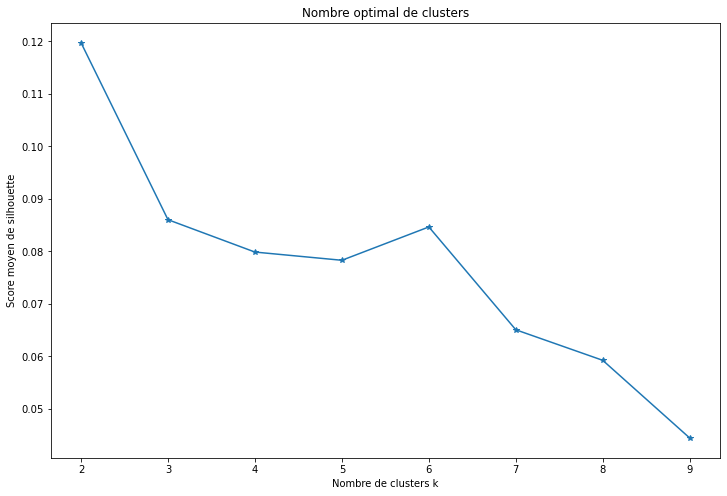

In [20]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_value = []
K = range(2,10)
for k in K:
    clusterer = KMeans(n_clusters=k)
    clusterer.fit(W)
    score = silhouette_score(W, clusterer.labels_)
    silhouette_value.append(score)

plt.figure(figsize=(12,8))
plt.plot(range(2, 10), silhouette_value, marker='*')
plt.xticks(range(2, 10))
plt.xlabel("Nombre de clusters k")
plt.ylabel("Score moyen de silhouette")
plt.title("Nombre optimal de clusters")
plt.show()

In [17]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(W)
labels = kmeans.labels_
print(labels)

[1 1 1 0 0 0 1 1 1 0 0 0]


In [21]:
ind2 = np.where(labels==2)
ind0 = np.where(labels==0)
ind1 = np.where(labels==1)
ind3 = np.where(labels==3)
print(ind2)
print(ind1)
print(ind0)
print(ind3)

(array([], dtype=int64),)
(array([0, 1, 2, 6, 7, 8]),)
(array([ 3,  4,  5,  9, 10, 11]),)
(array([], dtype=int64),)
